In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os



In [2]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel

In [3]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [4]:
from zipfile import ZipFile

In [5]:
os.getcwd()

'/home/negar/Downloads/projectdevika'

In [6]:
with ZipFile('/home/negar/Downloads/projectdevika/train_set.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [7]:
with ZipFile('/home/negar/Downloads/projectdevika/test_set.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [8]:
with ZipFile('/home/negar/Downloads/projectdevika/val_set.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [9]:
train_set = "/home/negar/Downloads/projectdevika/train_set"
val_set = "/home/negar/Downloads/projectdevika/val_set"
test_set = "/home/negar/Downloads/projectdevika/test_set"

image_size = 128

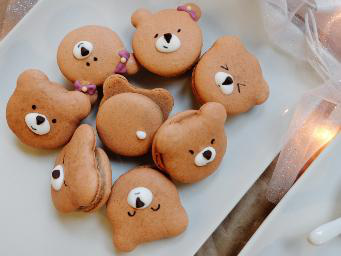

In [10]:
Image.open("/home/negar/Downloads/projectdevika/train_set/train_001733.jpg")

100%|██████████| 11994/11994 [00:06<00:00, 1817.76it/s]


Text(0.5, 1.0, 'Food in GrayScale')

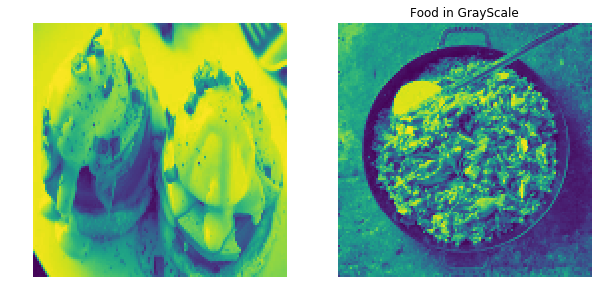

In [11]:
for image in tqdm(os.listdir(train_set)): 
    path = os.path.join(train_set, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
for image2 in tqdm(os.listdir(val_set)): 
    path = os.path.join(val_set, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Food in GrayScale")

100%|██████████| 28377/28377 [00:15<00:00, 1798.75it/s]


Text(0.5, 1.0, 'Food1 in GrayScale')

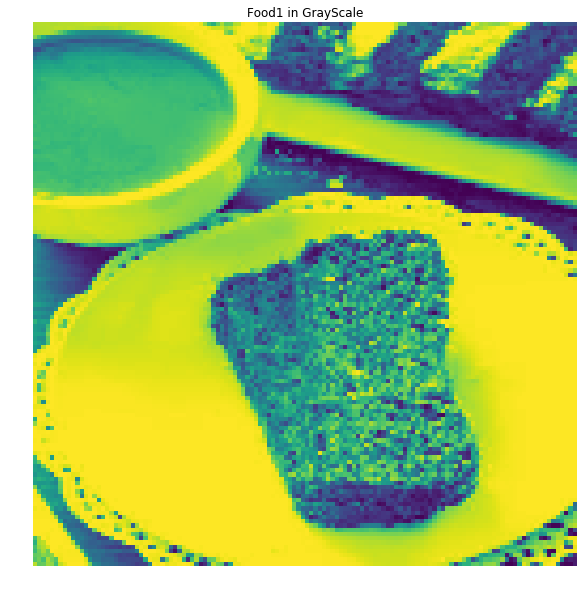

In [12]:
for image3 in tqdm(os.listdir(test_set)): 
    path = os.path.join(test_set, image3)
    img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img3 = cv2.resize(img3, (image_size, image_size)).flatten()   
    np_img3=np.asarray(img3)
plt.figure(figsize=(10,10))
plt.imshow(np_img3.reshape(image_size, image_size))
plt.axis('off')
plt.title("Food1 in GrayScale")

In [26]:
train_labels = pd.read_csv("/home/negar/Downloads/projectdevika/train_labels.csv")
val_labels = pd.read_csv("/home/negar/Downloads/projectdevika/val_labels.csv")


In [19]:
def train_data():
    train_data_m = [] 
    for image1 in tqdm(train_labels.index): 
        path = os.path.join(train_set, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_m.append(img1) 
    
    train_data= np.asarray(train_data_m)
    return train_data 

In [20]:
def val_data():
    val_data_m = [] 
    for image2 in tqdm(val_labels.index): 
        path = os.path.join(val_set, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        val_data_m.append(img2) 
    
    val_data= np.asarray(val_data_m)
    return val_data 

In [21]:
def test_data():
    test_data = [] 
    for image3 in tqdm(os.listdir(test_set)): 
        path = os.path.join(test_set, image3)
        img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img3 = cv2.resize(img3, (image_size, image_size))
        test_data.append(img3) 
    
    test_data= np.asarray(test_data)
    return test_data

In [22]:
train_data = train_data() 

100%|██████████| 118475/118475 [01:04<00:00, 1835.74it/s]


In [25]:
val_data = val_data()

100%|██████████| 11994/11994 [00:06<00:00, 1798.57it/s]


In [27]:
test_data = test_data()

100%|██████████| 28377/28377 [00:15<00:00, 1780.45it/s]


In [28]:
print(train_data.shape)

(118475, 128, 128)


In [29]:
print(val_data.shape)

(11994, 128, 128)


# Using Gabor

In [30]:
from skimage.filters import gabor
from skimage import io

def gfeature_matrix(data):
    features_list=[]
    for img in tqdm(data):

        filt_real, filt_imag = gabor(img, frequency=0.5)
        features_list.append(list(np.array(filt_real).flatten())+list(np.array(filt_imag).flatten()))

    # convert list of arrays into a matrix
    gfeature_matrix = np.array(features_list)
    return gfeature_matrix



In [31]:
train_data_gabor = gfeature_matrix(train_data)

100%|██████████| 118475/118475 [11:11<00:00, 176.41it/s]  


In [32]:
val_data_gabor = gfeature_matrix(val_data)

100%|██████████| 11994/11994 [00:51<00:00, 234.62it/s]


In [33]:
test_data_gabor = gfeature_matrix(test_data)

100%|██████████| 28377/28377 [01:59<00:00, 237.27it/s]


In [34]:
print('Gabor filter train matrix shape is: ', train_data_gabor.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
train_stand = ss.fit_transform(train_data_gabor)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
train_pca = ss.fit_transform(train_stand)
# look at new shape
print('PCA matrix shape is: ', train_pca.shape)



print('Gabor filter val matrix shape is: ', val_data_gabor.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
val_stand = ss.fit_transform(val_data_gabor)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
val_pca = ss.fit_transform(val_stand)
# look at new shape
print('PCA matrix shape is: ', val_pca.shape)

print('Gabor filter test matrix shape is: ', test_data_gabor.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
test_stand = ss.fit_transform(test_data_gabor)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
test_pca = ss.fit_transform(test_stand)
# look at new shape
print('PCA matrix shape is: ', test_pca.shape)

Gabor filter train matrix shape is:  (118475, 32768)
PCA matrix shape is:  (118475, 32768)
Gabor filter val matrix shape is:  (11994, 32768)
PCA matrix shape is:  (11994, 32768)
Gabor filter test matrix shape is:  (28377, 32768)
PCA matrix shape is:  (28377, 32768)


In [35]:
np.array(list(val_labels.values[:,1]))

array([247, 234, 222, ...,  72, 124, 109])

In [36]:
X_train = pd.DataFrame(train_pca)
y_train = np.array(list(train_labels.values[:,1]))
X_val = pd.DataFrame(val_pca)
y_val = np.array(list(val_labels.values[:,1]))


In [43]:
X_small_train, X, y_small_train, y = train_test_split(X_train,y_train, test_size = 0.9)

X_small_val, X2, y_small_val, y2 = train_test_split(X_val,y_val, test_size = 0.9)

In [44]:
print(X_small_val.shape)

(1199, 32768)


In [ ]:
svm2 = SVC(kernel = 'rbf',C = 1, gamma = 0.1, probability = True, random_state = 42 )

svm2.fit(X_small_train,np.array(list(y_small_train)))
y_small_pred = svm2.predict(X_small_val)

# calculate accuracy
smallaccuracy = accuracy_score(y_small_val, y_small_pred)
print('Small model accuracy is: ', smallaccuracy)

In [ ]:
y_smallpred_test = svm2.predict(X_test)

In [ ]:
import pprint, pickle

output = open('y_smallpred_test.pkl', 'wb')
pickle.dump(y_smallpred_test, output)
output.close()



In [ ]:

pkl_file = open('y_smallpred_test.pkl', 'rb')
y_smallpred_test = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
'''from sklearn.model_selection import GridSearchCV



param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,np.array(list(y_train)))
print(grid.best_estimator_)'''

In [ ]:
svm = SVC(kernel = 'rbf',C = 1, gamma = 0.1, probability = True, random_state = 42 )

svm.fit(X_train,np.array(list(y_train)))
y_pred = svm.predict(X_val)

# calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Model accuracy is: ', accuracy)

In [ ]:
y_pred_test = svm.predict(X_test)

In [ ]:
import pprint, pickle

output = open('y_pred_test.pkl', 'wb')
pickle.dump(y_pred_test, output)
output.close()


pkl_file = open('y_pred_test.pkl', 'rb')
y_pred_test = pickle.load(pkl_file)
pkl_file.close()

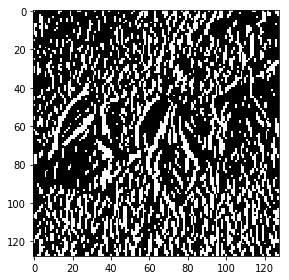

In [44]:
filt_real, filt_imag = gabor(train_data[0], frequency=0.6)
plt.figure()            # doctest: +SKIP
io.imshow(filt_imag)    # doctest: +SKIP
io.show()

# using hog feature 

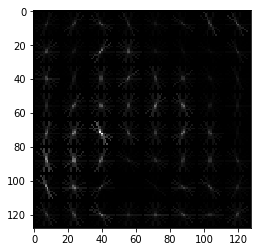

In [36]:
hog_features, hog_image = hog(train_data[3],
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.gray)

In [38]:
hog_features.shape

(2916,)

In [47]:
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack(color_features)
    return flat_features

train_features = create_features(train_data[0])

print(train_features.shape)

(16384,)


In [74]:
def create_feature_matrix(data):
    features_list = []
    
    for img in tqdm(data):
        # load image
        #img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
train_feature_matrix = create_feature_matrix(train_data)
val_feature_matrix = create_feature_matrix(val_data)
test_feature_matrix = create_feature_matrix(test_data)

100%|██████████| 28377/28377 [32:54<00:00, 14.37it/s]


In [1]:
print('Feature matrix shape is: ', train_feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
train_stand = ss.fit_transform(train_feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
train_pca = ss.fit_transform(train_stand)
# look at new shape
print('PCA matrix shape is: ', train_pca.shape)

NameError: name 'train_feature_matrix' is not defined

In [ ]:
print('Feature matrix shape is: ', val_feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
val_stand = ss.fit_transform(val_feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
val_pca = ss.fit_transform(val_stand)
# look at new shape
print('PCA matrix shape is: ', val_pca.shape)

In [ ]:
X_train = pd.DataFrame(train_pca)
y_train = pd.DataFrame(train_labels.values)
X_val = pd.DataFrame(val_pca)
y_val = pd.DataFrame(val_labels.values)

y_train.value_counts()

In [ ]:
from sklearn.model_selection import GridSearchCV



param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

In [ ]:
svm = grid.best_estimator_

svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)

# calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Model accuracy is: ', accuracy)